In [1]:
from src.sqlstore.db import connect_to_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
engine = connect_to_db("../src/database.ini")

In [3]:
query = "SELECT * FROM match"

In [4]:
df = pd.read_sql_query(query, engine)

In [5]:
query1 = "SELECT * FROM match_participant_stats"

In [6]:
df1 = pd.read_sql_query(query1, engine)

In [7]:
df = pd.merge(df, df1, on='gameId', how='inner')

In [20]:
df_timeline = pd.read_sql_query("SELECT * FROM timeline", engine)
df_timeline_frames = pd.read_sql_query("SELECT * FROM frame", engine)
#df_timeline_events = pd.read_sql_query("SELECT * FROM events", engine)
df_timeline = pd.merge(df_timeline, df_timeline_frames, on='frameId', how='inner')
#df_timeline = pd.merge(df_timeline, df)

KeyError: 'frameId'

In [ ]:
df_timeline.head()

In [8]:
df

,matchId,platformId_x,gameId,seasonId,patch,queueId,gameVersion,mapId,gameDuration,gameCreation,...,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,timeCreated_y,lastUpdate_y
0,EUW1_6582962823,EUW1,6582962823,13,17,420,13.17.529.525,11,1686,1694035969977,...,2,0,0,23,5,2,7,True,2023-09-09 12:13:08.286724+00:00,None
1,EUW1_6582962823,EUW1,6582962823,13,17,420,13.17.529.525,11,1686,1694035969977,...,2,0,0,37,4,9,4,True,2023-09-09 12:13:08.286724+00:00,None
2,EUW1_6582962823,EUW1,6582962823,13,17,420,13.17.529.525,11,1686,1694035969977,...,2,0,0,14,0,2,7,True,2023-09-09 12:13:08.286724+00:00,None
3,EUW1_6582962823,EUW1,6582962823,13,17,420,13.17.529.525,11,1686,1694035969977,...,2,0,0,31,1,5,10,True,2023-09-09 12:13:08.286724+00:00,None
4,EUW1_6582962823,EUW1,6582962823,13,17,420,13.17.529.525,11,1686,1694035969977,...,2,0,0,65,9,9,20,True,2023-09-09 12:13:08.286724+00:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335795,EUW1_6559692203,EUW1,6559692203,13,16,420,13.16.525.6443,11,1495,1692534282672,...,10,0,0,12,0,1,6,False,2023-09-11 09:33:18.158253+00:00,None
335796,EUW1_6559692203,EUW1,6559692203,13,16,420,13.16.525.6443,11,1495,1692534282672,...,10,0,0,28,6,4,8,False,2023-09-11 09:33:18.158253+00:00,None
335797,EUW1_6559692203,EUW1,6559692203,13,16,420,13.16.525.6443,11,1495,1692534282672,...,10,0,0,12,0,0,9,False,2023-09-11 09:33:18.158253+00:00,None
335798,EUW1_6559692203,EUW1,6559692203,13,16,420,13.16.525.6443,11,1495,1692534282672,...,10,0,0,19,3,0,10,False,2023-09-11 09:33:18.158253+00:00,None


In [9]:
df.to_csv('../data/match_test.csv', index=False)

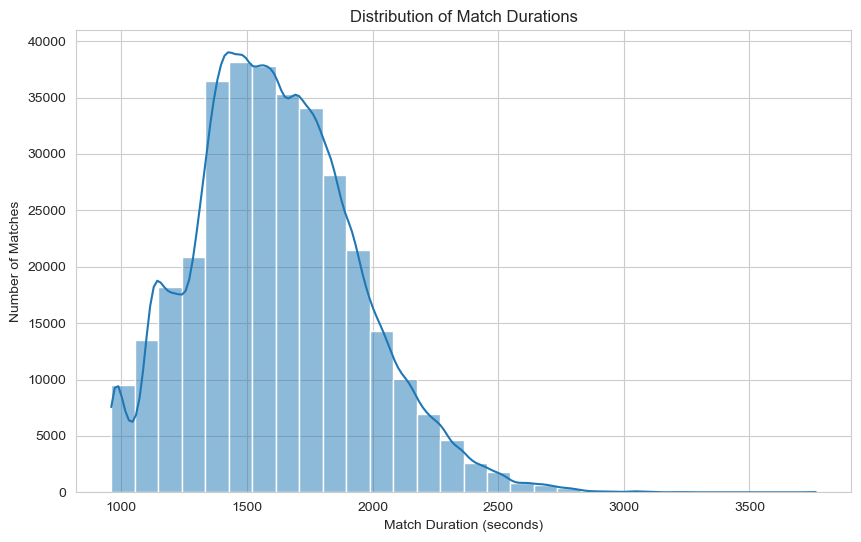

In [10]:
sns.set_style("whitegrid")

# Plotting the distribution of match durations
plt.figure(figsize=(10, 6))
sns.histplot(df['gameDuration'], bins=30, kde=True)
plt.title('Distribution of Match Durations')
plt.xlabel('Match Duration (seconds)')
plt.ylabel('Number of Matches')
plt.show()

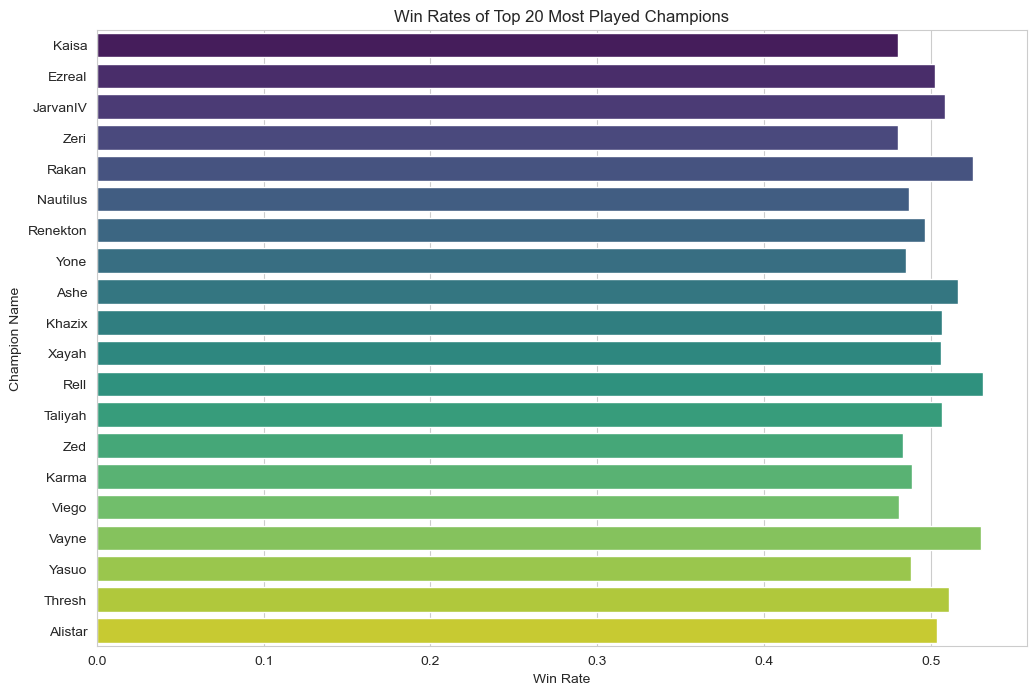

In [11]:
# Calculating win rates for each champion
champion_win_rates = df.groupby('championName').agg({'win': ['sum', 'count']})
champion_win_rates.columns = ['wins', 'games_played']
champion_win_rates['win_rate'] = champion_win_rates['wins'] / champion_win_rates['games_played']

# Sorting champions by games played and taking the top 20
top_champions = champion_win_rates.sort_values(by='games_played', ascending=False).head(20)

# Plotting win rates of the top 20 champions
plt.figure(figsize=(12, 8))
sns.barplot(x=top_champions['win_rate'], y=top_champions.index, orient='h', palette='viridis')
plt.title('Win Rates of Top 20 Most Played Champions')
plt.xlabel('Win Rate')
plt.ylabel('Champion Name')
plt.show()

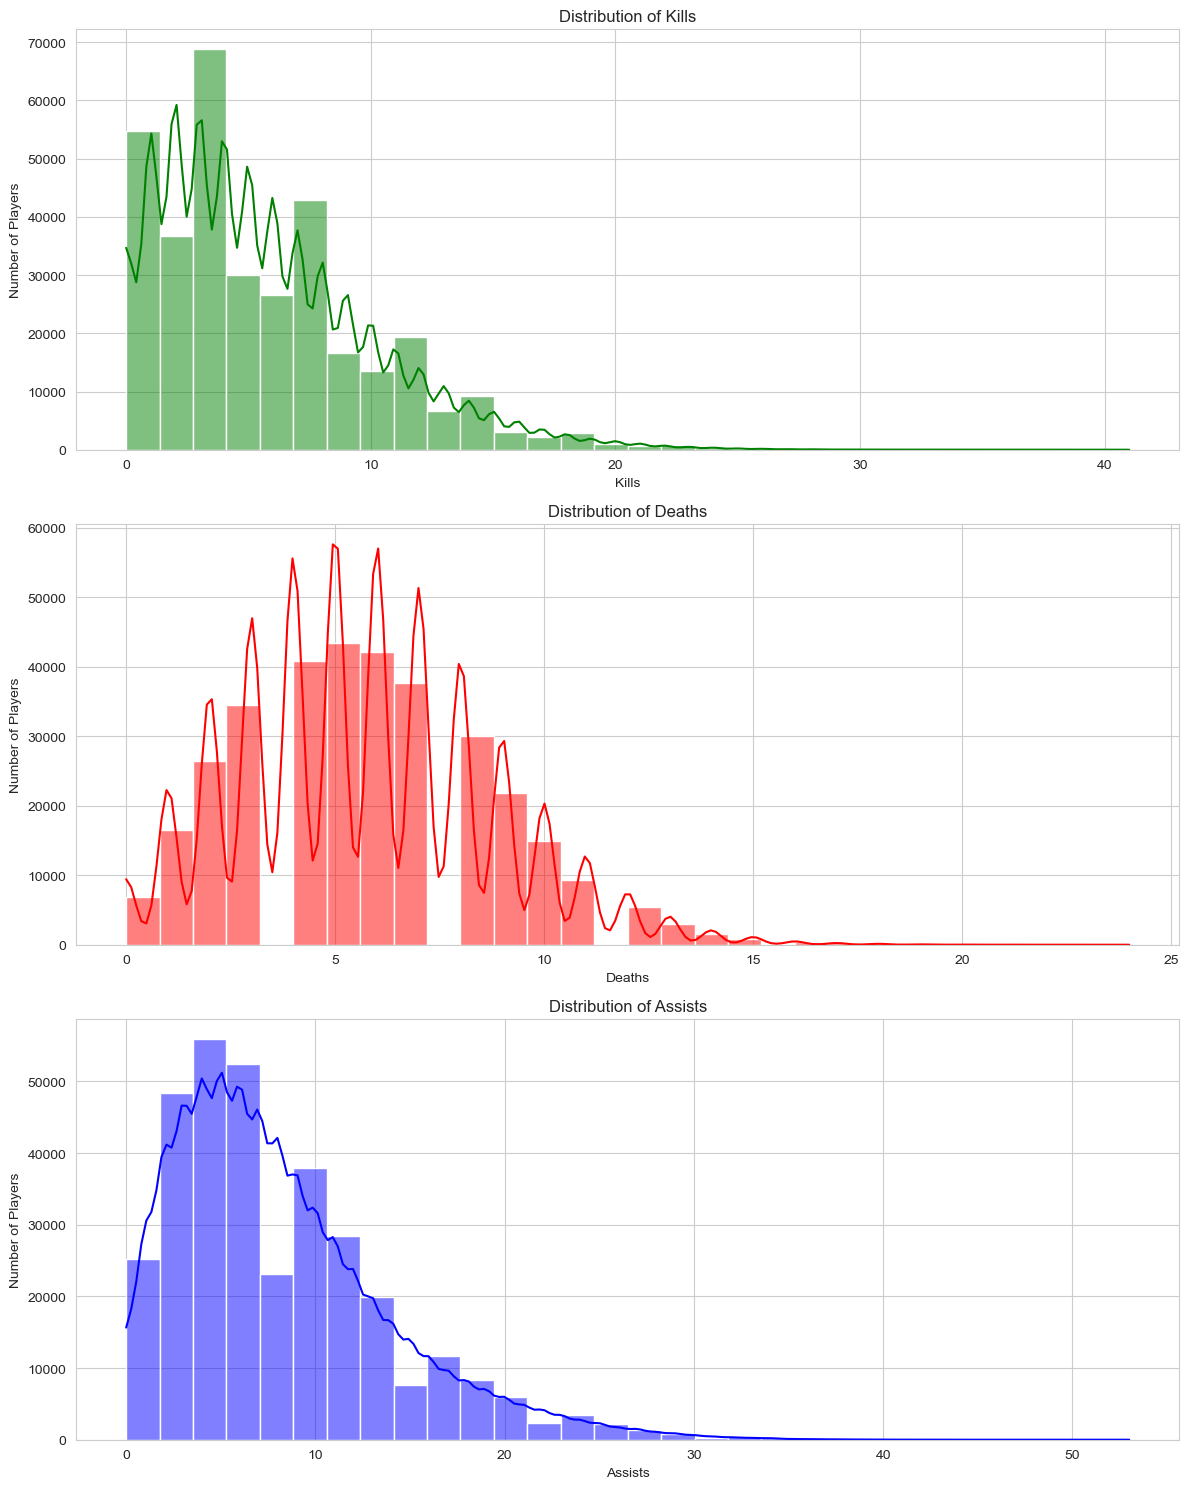

In [12]:
# Plotting distributions of kills, deaths, and assists
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

sns.histplot(df['kills'], bins=30, kde=True, ax=axes[0], color='green')
axes[0].set_title('Distribution of Kills')
axes[0].set_xlabel('Kills')
axes[0].set_ylabel('Number of Players')

sns.histplot(df['deaths'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribution of Deaths')
axes[1].set_xlabel('Deaths')
axes[1].set_ylabel('Number of Players')

sns.histplot(df['assists'], bins=30, kde=True, ax=axes[2], color='blue')
axes[2].set_title('Distribution of Assists')
axes[2].set_xlabel('Assists')
axes[2].set_ylabel('Number of Players')

plt.tight_layout()
plt.show()


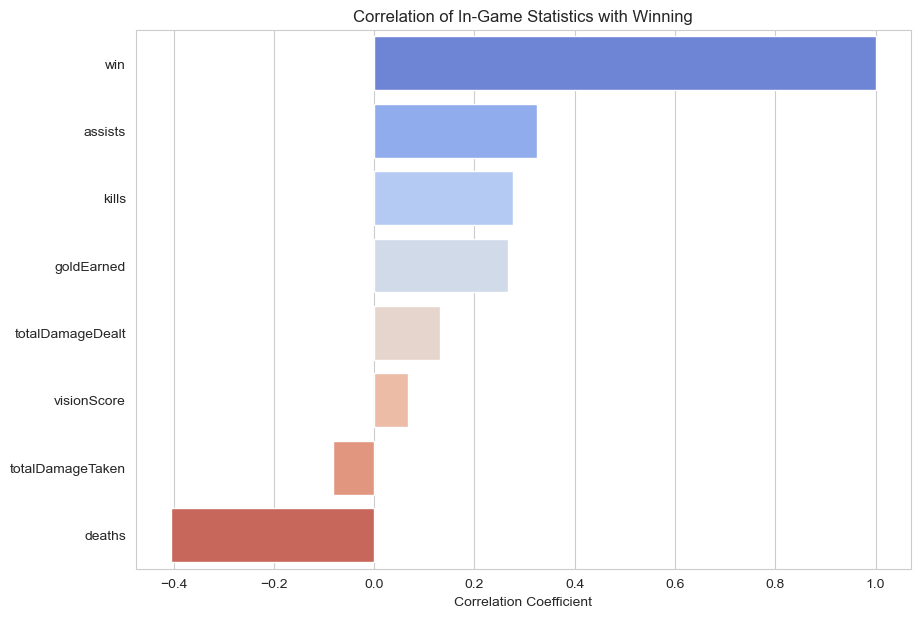

In [13]:
# Selecting specific columns
selected_columns = ['kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealt', 'totalDamageTaken', 'visionScore', 'win']
correlation_data = df[selected_columns]

# Calculating the correlation with winning
correlations = correlation_data.corr()['win'].sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of In-Game Statistics with Winning')
plt.xlabel('Correlation Coefficient')
plt.show()

In [14]:
features = ['kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealt', 'totalDamageTaken', 'visionScore']
X = df[features]
y = df['win']

# Splitting the df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicting
y_pred = clf.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7998808814770697

In [17]:
df['total_pings'] = df['assistMePings'].sum(axis=1)

champion_aggregated = df.groupby('championName').agg({
    'total_pings': 'sum',
    'gameId': 'count'
}).rename(columns={'gameId': 'play_count'})

champion_aggregated['normalized_pings'] = champion_aggregated['total_pings'] / champion_aggregated['play_count']

sorted_champions_by_pings = champion_aggregated.sort_values(by='normalized_pings', ascending=False)

sorted_champions_by_pings

ValueError: No axis named 1 for object type Series

In [18]:
role_aggregated_pings = df.groupby('lane').agg({
    'total_pings': 'sum',
    'gameId': 'count'
}).rename(columns={'gameId': 'play_count'})

role_aggregated_pings['normalized_pings'] = role_aggregated_pings['total_pings'] / role_aggregated_pings['play_count']

sorted_roles_by_pings = role_aggregated_pings.sort_values(by='normalized_pings', ascending=False)

if 'baitEmotes' in df.columns:
    role_aggregated_emotes = df.groupby('lane')['baitEmotes'].mean()
    sorted_roles_by_emotes = role_aggregated_emotes.sort_values(ascending=False)
else:
    sorted_roles_by_emotes = None

sorted_roles_by_pings, sorted_roles_by_emotes

KeyError: "Column(s) ['total_pings'] do not exist"

In [19]:
champion_aggregated_baitPings = df.groupby('championName').agg({
    'baitPings': 'sum',
    'gameId': 'count'
}).rename(columns={'gameId': 'play_count'})

champion_aggregated_baitPings['normalized_baitPings'] = champion_aggregated_baitPings['baitPings'] / champion_aggregated_baitPings['play_count']

sorted_champions_by_baitPings = champion_aggregated_baitPings.sort_values(by='normalized_baitPings', ascending=False)

sorted_champions_by_baitPings.head(10)

,baitPings,play_count,normalized_baitPings
championName,,,
Katarina,3438,1721,1.997676
Hecarim,5952,3028,1.965654
MasterYi,2404,1273,1.888452
Rengar,3730,2076,1.796724
Evelynn,3464,1959,1.768249
Draven,4981,3008,1.655918
Udyr,2084,1297,1.606785
Kindred,2303,1529,1.506213
Akshan,3067,2050,1.496098
